# Objective

* Identify the Which Platform have more impact on price range 

* To build the Model which will help to Predict the future price range based on Money invest in Different Platform 

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [6]:
new = pd.read_csv(r"C:\Users\Arati V Kathe\Downloads\archive (6)\mob_price_data.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


# Data Type 

In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2000 non-null   int64  
 1   Clock_Speed    2000 non-null   float64
 2   FC             2000 non-null   int64  
 3   Int_Memory     2000 non-null   int64  
 4   Mobile_D       2000 non-null   float64
 5   Mobile_W       2000 non-null   int64  
 6   Cores          2000 non-null   int64  
 7   PC             2000 non-null   int64  
 8   Pixel_H        2000 non-null   int64  
 9   Pixel_W        2000 non-null   int64  
 10  Ram            2000 non-null   int64  
 11  Screen_H       2000 non-null   int64  
 12  Screen_W       2000 non-null   int64  
 13  Talk_Time      2000 non-null   int64  
 14  Four_G         2000 non-null   int64  
 15  Three_G        2000 non-null   int64  
 16  Touch_Screen   2000 non-null   int64  
 17  Dual_SIM       2000 non-null   int64  
 18  Bluetoot

# Univariate Analysis

In [8]:
# Let's look at some statistical information about our dataframe.
new.describe() 

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,...,12.306500,5.767000,11.011000,0.521500,0.761500,0.503000,0.509500,0.4950,0.507000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,...,4.213245,4.356398,5.463955,0.499662,0.426273,0.500116,0.500035,0.5001,0.500076,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,...,9.000000,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,...,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,1.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,...,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

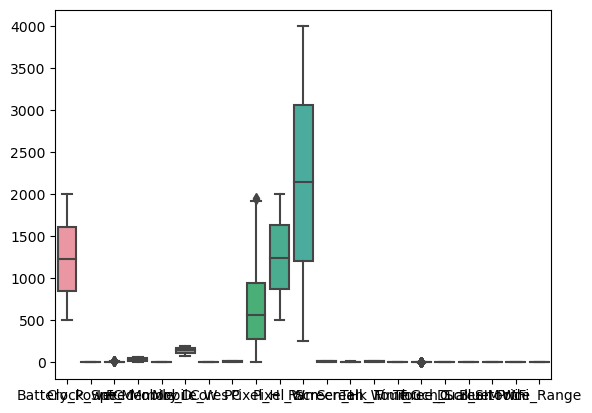

In [9]:
sns.boxplot(data=new)

### Winsorizing Technique -- Treatment of Outlier

In [10]:
def outliers(new):
    a = new.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = new[i].quantile(0.25)
        q3 = new[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        new[i] = np.where(new[i]>upper_limit,upper_limit,new[i])
        new[i] = np.where(new[i]<lower_limit,lower_limit,new[i])

In [11]:
outliers(new)

<AxesSubplot:>

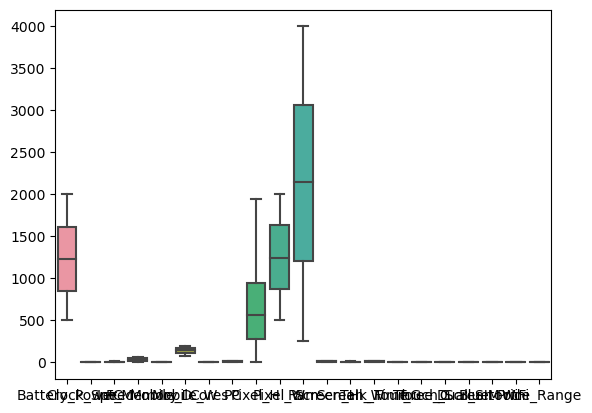

In [12]:
sns.boxplot(data=new)

### Missing Value

In [183]:
new.isna().sum()  # no missing data

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [184]:
label = ["3G-supported",'Not supported']
values=new['three_g'].value_counts().values

In [185]:
import plotly.express as px

fig = px.pie(new, labels='three_g',color='three_g',
             color_discrete_map={'1':'red',
                                 '0':'green'})
fig.show()

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [186]:
new.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,1.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


In [187]:
# Putting feature variable to X
X = new.drop('price_range', axis= 1)

# Putting response variable to y
y = new[['price_range']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [188]:
df = pd.concat([y_train, X_train], axis=1)
df.head()  

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,...,9.0,253.0,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,...,9.0,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,...,5.0,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,...,17.0,356.0,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,...,15.0,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0


# Correlation Matrix

In [189]:
df.corr()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,1.000000,0.207995,0.049980,0.000119,0.020749,0.034475,0.044003,0.036079,0.005033,-0.023828,...,0.046044,0.142675,0.162907,0.914358,0.040332,0.058193,0.036122,NaN,-0.030258,0.027953
battery_power,0.207995,1.000000,0.036025,0.012164,-0.032733,0.063196,0.025784,-0.001671,0.020935,0.009669,...,0.036296,0.019717,0.009447,-0.001216,0.002394,0.006273,0.058068,NaN,-0.015106,-0.011010
blue,0.049980,0.036025,1.000000,0.022452,0.083034,-0.016097,0.025984,0.038607,0.009048,-0.001281,...,-0.025150,-0.009478,-0.042799,0.051227,0.015449,0.000847,-0.014710,NaN,0.018524,-0.038308
clock_speed,0.000119,0.012164,0.022452,1.000000,0.006143,-0.016673,-0.048224,-0.010468,-0.010463,-0.004464,...,-0.025380,-0.003057,-0.017485,0.006460,-0.009665,0.025360,0.001976,NaN,0.015325,0.010533
dual_sim,0.020749,-0.032733,0.083034,0.006143,1.000000,-0.014380,0.008248,-0.008877,-0.024481,-0.032266,...,-0.009177,-0.027627,-0.000760,0.041582,-0.006507,-0.014062,-0.057912,NaN,-0.009940,0.012515
fc,0.034475,0.063196,-0.016097,-0.016673,-0.014380,1.000000,-0.022015,-0.007136,0.025756,0.017409,...,0.643127,-0.014253,0.005047,0.015298,-0.010011,0.013282,-0.015008,NaN,-0.044899,0.004153
four_g,0.044003,0.025784,0.025984,-0.048224,0.008248,-0.022015,1.000000,0.013586,-0.022076,-0.028267,...,-0.014045,-0.023204,0.000698,0.032156,0.034230,0.063701,-0.059042,NaN,0.004385,-0.007702
int_memory,0.036079,-0.001671,0.038607,-0.010468,-0.008877,-0.007136,0.013586,1.000000,0.017449,-0.021234,...,-0.023056,0.009869,-0.019192,0.020938,0.021499,0.003992,-0.020291,NaN,-0.009607,-0.008204
m_dep,0.005033,0.020935,0.009048,-0.010463,-0.024481,0.025756,-0.022076,0.017449,1.000000,0.048176,...,0.045496,0.021491,0.043597,-0.001245,-0.032826,-0.029233,0.031192,NaN,-0.011392,-0.044459
mobile_wt,-0.023828,0.009669,-0.001281,-0.004464,-0.032266,0.017409,-0.028267,-0.021234,0.048176,1.000000,...,0.016971,-0.004789,-0.015381,-0.000330,-0.031753,-0.042575,0.005432,NaN,-0.028131,0.006862


# Removing Irrelavent Variable

In [190]:
df=df.drop(['mobile_wt', 'n_cores', 'touch_screen'],axis=1)

<AxesSubplot:>

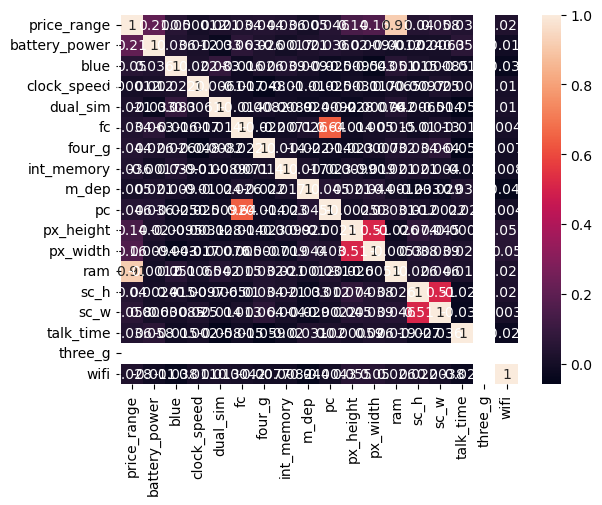

In [191]:
sns.heatmap(df.corr(),annot = True)

#### ram have 91%  strong positve correlation with price range

* ram have high impact on price_range
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [192]:
df.shape

(1400, 18)

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1=df.drop(['price_range'],axi s=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i)
                          for i in range(X1.shape[1])], # i=0,1,2
                         index=X1.columns) #column name
series_before

battery_power     1.012038
blue              1.018182
clock_speed       1.005981
dual_sim          1.015274
fc                1.718024
four_g            1.014522
int_memory        1.004980
m_dep             1.009998
pc                1.718643
px_height         1.364191
px_width          1.362380
ram               1.010912
sc_h              1.364963
sc_w              1.366420
talk_time         1.016979
three_g          47.105620
wifi              1.009998
dtype: float64

In [194]:
X1=df.drop(['price_range', 'three_g'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

battery_power     7.765678
blue              1.990656
clock_speed       4.011983
dual_sim          2.005048
fc                3.458527
four_g            2.029350
int_memory        3.923155
m_dep             3.871361
pc                6.221588
px_height         4.301130
px_width         11.178915
ram               4.620660
sc_h             11.218281
sc_w              3.720897
talk_time         4.776388
wifi              2.029316
dtype: float64

In [195]:
X1=df.drop(['price_range', 'three_g', 'px_width'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

battery_power     7.605621
blue              1.990557
clock_speed       3.980102
dual_sim          1.991138
fc                3.458185
four_g            2.018378
int_memory        3.904078
m_dep             3.805513
pc                6.170567
px_height         3.080829
ram               4.577085
sc_h             11.013268
sc_w              3.720753
talk_time         4.680177
wifi              2.016261
dtype: float64

In [196]:
X1=df.drop(['price_range', 'three_g', 'px_width', 'sc_h'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

battery_power    7.348397
blue             1.982753
clock_speed      3.937890
dual_sim         1.978844
fc               3.451976
four_g           2.007803
int_memory       3.823263
m_dep            3.773487
pc               6.083433
px_height        3.014398
ram              4.515649
sc_w             2.654346
talk_time        4.600708
wifi             1.999517
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

# Model Building

*  H0 :- There is no Linear relationship between price range and all indep variables

* Vs 

*  H1 :- There is Linear relationship between price range and all indep variables

Alpha = 0.05 (5%)

In [66]:
import statsmodels.formula.api as smf
model = smf.ols('price_range ~ battery_power + blue + clock_speed + dual_sim + fc + four_g + int_memory + m_dep + pc + px_height + ram + sc_w + talk_time + wifi + three_g + px_width + sc_h',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     944.0
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:31:55   Log-Likelihood:                -399.75
No. Observations:                1400   AIC:                             833.5
Df Residuals:                    1383   BIC:                             922.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8653      0.030    -29.128      0.000      -0.924      -0.807
battery_power     0.0005   1.97e-05     26.132      0.000       0.000       0.001
blue              0.0029      0.017      0.164      0.870      -0.031       0.037
clock_speed      -0.0071      0.011     -0.666      0.506      -0.028       0.014
dual_sim         -0.0163      0.017     -0.936      0.350      -0.051       0.018
fc                0.0018      0.003      0.691      0.490      -0.003       0.007
four_g            0.0247      0.017      1.413      0.158      -0.010       0.059
int_memory        0.0011      0.000      2.340      0.019       0.000       0.002
m_dep            -0.0236      0.030     -0.780      0.436      -0.083       0.036
pc                0.0005      0.002      0.269      0.788      -0.003       0.004
px_height         0.0003   2.29e-05     11.504      0.000       0.000       0.000
ram               0.0009    8.1e-06    117.108      0.000       0.001       0.001
sc_w              0.0011      0.002      0.496      0.620      -0.003       0.006
talk_time         0.0009      0.002      0.568      0.570      -0.002       0.004
wifi             -0.0107      0.017     -0.612      0.541      -0.045       0.023
three_g          -0.8653      0.030    -29.128      0.000      -0.924      -0.807
px_width          0.0003   2.34e-05     12.419      0.000       0.000       0.000
sc_h              0.0002      0.002      0.081      0.935      -0.005       0.005
==============================================================================
Omnibus:                       67.042   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.745
Skew:                           0.042   Prob(JB):                     9.45e-07
Kurtosis:                       2.315   Cond. No.                     1.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* There is Linear relationship between price_sales and all indep variables
* There is no Linear relationship between price sales and three_g, mobile_wt, px_width and sc_h 
 * so we will remove and re-run the model 
* 91% is accuracy of model , so we say model is good fit 

In [67]:
# removing the insignificant variable 
model2=smf.ols('price_range ~ battery_power + blue + clock_speed + dual_sim + fc + four_g + int_memory + m_dep + pc + px_height + ram + sc_w + talk_time + wifi' ,data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     962.1
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:34:02   Log-Likelihood:                -473.77
No. Observations:                1400   AIC:                             977.5
Df Residuals:                    1385   BIC:                             1056.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4787      0.054    -27.361      0.000      -1.585      -1.373
battery_power     0.0005   2.08e-05     24.784      0.000       0.000       0.001
blue             -0.0065      0.018     -0.352      0.725      -0.043       0.030
clock_speed      -0.0093      0.011     -0.833      0.405      -0.031       0.013
dual_sim         -0.0117      0.018     -0.638      0.523      -0.048       0.024
fc                0.0015      0.003      0.538      0.591      -0.004       0.007
four_g            0.0283      0.018      1.538      0.124      -0.008       0.064
int_memory        0.0010      0.001      1.918      0.055    -2.2e-05       0.002
m_dep            -0.0091      0.032     -0.284      0.776      -0.072       0.053
pc                0.0012      0.002      0.620      0.535      -0.003       0.005
px_height         0.0004   2.08e-05     19.657      0.000       0.000       0.000
ram               0.0009   8.53e-06    111.245      0.000       0.001       0.001
sc_w              0.0017      0.002      0.834      0.405      -0.002       0.006
talk_time         0.0015      0.002      0.903      0.367      -0.002       0.005
wifi             -0.0050      0.018     -0.271      0.787      -0.041       0.031
==============================================================================
Omnibus:                       43.123   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.460
Skew:                           0.105   Prob(JB):                     1.33e-05
Kurtosis:                       2.416   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* There is Linear relationship between price_sales and all indep variables
* 90% is accuracy of model , so we say model is good fit 

# Multicolinearity (with the help of VIF)

In [68]:
X1=df.drop(['price_range', 'three_g', 'px_width', 'sc_h'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

battery_power    7.348397
blue             1.982753
clock_speed      3.937890
dual_sim         1.978844
fc               3.451976
four_g           2.007803
int_memory       3.823263
m_dep            3.773487
pc               6.083433
px_height        3.014398
ram              4.515649
sc_w             2.654346
talk_time        4.600708
wifi             1.999517
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [69]:
df.head()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,9.0,253.0,590.0,696.0,14.0,7.0,3.0,1.0,0.0
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,9.0,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,1.0
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,5.0,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,17.0,356.0,563.0,373.0,14.0,9.0,3.0,1.0,1.0
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,15.0,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,0.0


In [70]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,fitted_value,residual
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,9.0,253.0,590.0,696.0,14.0,7.0,3.0,1.0,0.0,0.237911,-0.237911
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,9.0,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,1.0,-0.185525,0.185525
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,5.0,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,1.255362,-0.255362
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,17.0,356.0,563.0,373.0,14.0,9.0,3.0,1.0,1.0,0.106173,-0.106173
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,15.0,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,0.0,0.205612,-0.205612


# Linearity

<AxesSubplot:title={'center':'ram vs price range'}, xlabel='ram', ylabel='price_range'>

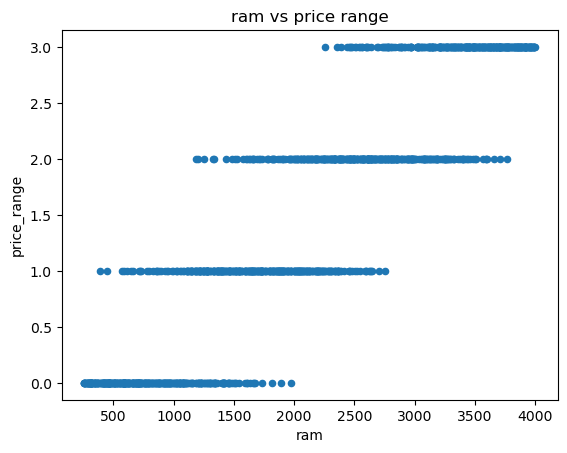

In [71]:
df.plot.scatter(x='ram', y='price_range', title='ram vs price range')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

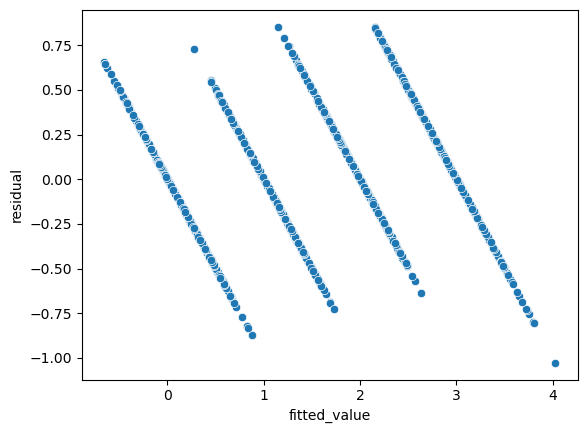

In [72]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

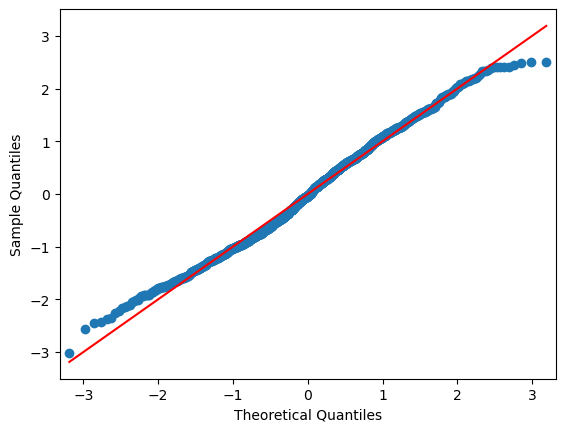

In [73]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

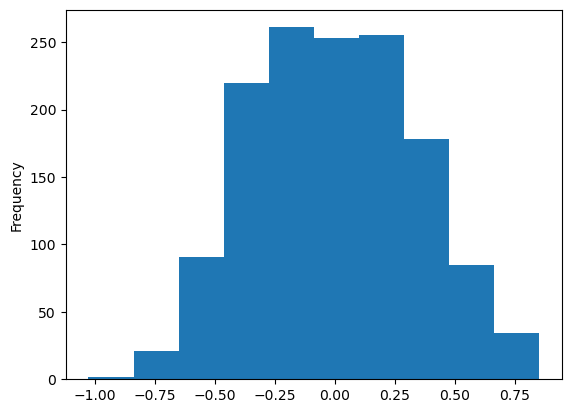

In [74]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [75]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1890,1991.0,0.0,2.8,0.0,3.0,1.0,15.0,0.1,181.0,1.0,...,298.0,1037.0,1861.0,8.0,5.0,17.0,1.0,1.0,1.0,1.0
1005,1270.0,1.0,2.3,0.0,0.0,0.0,58.0,0.5,104.0,5.0,...,1512.0,1716.0,3299.0,13.0,4.0,16.0,1.0,0.0,1.0,3.0
29,851.0,0.0,0.5,0.0,3.0,0.0,21.0,0.4,200.0,5.0,...,1171.0,1263.0,478.0,12.0,7.0,10.0,1.0,0.0,1.0,0.0
695,560.0,1.0,2.0,1.0,6.0,1.0,57.0,0.3,81.0,3.0,...,80.0,1327.0,2167.0,11.0,10.0,7.0,1.0,0.0,1.0,1.0
1858,1615.0,1.0,2.8,0.0,3.0,0.0,9.0,0.9,117.0,1.0,...,542.0,678.0,2948.0,8.0,3.0,3.0,1.0,1.0,0.0,2.0


In [76]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Prediction
1890,1991.0,0.0,2.8,0.0,3.0,1.0,15.0,0.1,181.0,1.0,...,1037.0,1861.0,8.0,5.0,17.0,1.0,1.0,1.0,1.0,1.502274
1005,1270.0,1.0,2.3,0.0,0.0,0.0,58.0,0.5,104.0,5.0,...,1716.0,3299.0,13.0,4.0,16.0,1.0,0.0,1.0,3.0,2.977648
29,851.0,0.0,0.5,0.0,3.0,0.0,21.0,0.4,200.0,5.0,...,1263.0,478.0,12.0,7.0,10.0,1.0,0.0,1.0,0.0,-0.059954
695,560.0,1.0,2.0,1.0,6.0,1.0,57.0,0.3,81.0,3.0,...,1327.0,2167.0,11.0,10.0,7.0,1.0,0.0,1.0,1.0,0.991044
1858,1615.0,1.0,2.8,0.0,3.0,0.0,9.0,0.9,117.0,1.0,...,678.0,2948.0,8.0,3.0,3.0,1.0,1.0,0.0,2.0,2.372579


# Test

In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.price_range, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.91


# Train

In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(df.price_range, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.91


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Decision Tree

# Model Building

In [121]:
df.shape

(1400, 18)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 1917 to 1703
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_range    1400 non-null   float64
 1   battery_power  1400 non-null   float64
 2   blue           1400 non-null   float64
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   float64
 5   fc             1400 non-null   float64
 6   four_g         1400 non-null   float64
 7   int_memory     1400 non-null   float64
 8   m_dep          1400 non-null   float64
 9   pc             1400 non-null   float64
 10  px_height      1400 non-null   float64
 11  px_width       1400 non-null   float64
 12  ram            1400 non-null   float64
 13  sc_h           1400 non-null   float64
 14  sc_w           1400 non-null   float64
 15  talk_time      1400 non-null   float64
 16  three_g        1400 non-null   float64
 17  wifi           1400 non-null   float64
dtypes: fl

# Data Partition

In [109]:
# Putting feature variable to X
X = new.drop('price_range', axis= 1)

# Putting response variable to y
y = new[['price_range']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

# Model Building

In [110]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Plotting The Graph

In [111]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,...,9.0,253.0,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,...,9.0,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,...,5.0,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,...,17.0,356.0,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,...,15.0,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0


In [112]:
independent_variable = list(train.columns[1:])
independent_variable

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

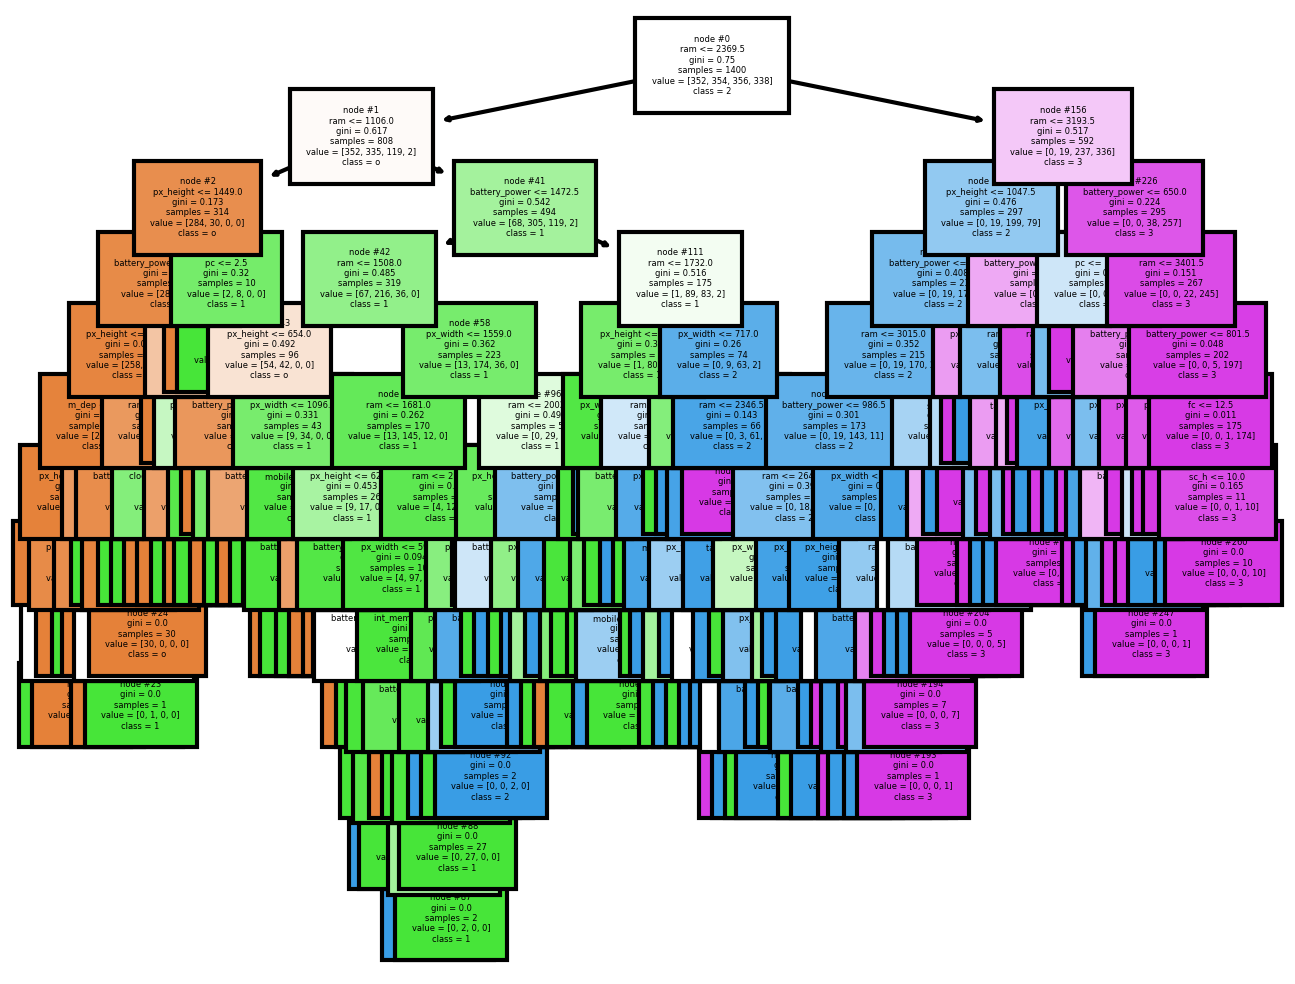

In [115]:
from sklearn import tree
import matplotlib.pyplot as plt

price_range=['o', '1', '2', '3']  # array   y indep variable ans
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=price_range, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Prediction on Train Dataset

In [116]:
train.head()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,...,9.0,253.0,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,...,9.0,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,...,5.0,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,...,17.0,356.0,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,...,15.0,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0


In [117]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,...,253.0,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0,0.0
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,...,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0,0.0
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,...,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0,1.0
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,...,356.0,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0,0.0
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,...,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0,0.0


# Model Perfomance Matrics

In [118]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['price_range'])
print(matrix)

[[352   0   0   0]
 [  0 354   0   0]
 [  0   0 356   0]
 [  0   0   0 338]]


In [122]:
train.shape

(1400, 22)

In [123]:
Accuracy_Train=((352+354+356+338)/(1400)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [124]:
from sklearn.metrics import classification_report
print(classification_report(train['price_range'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       352
         1.0       1.00      1.00      1.00       354
         2.0       1.00      1.00      1.00       356
         3.0       1.00      1.00      1.00       338

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



### Model Improvement by Pruning Method ( Cut Tree)

In [144]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=200)

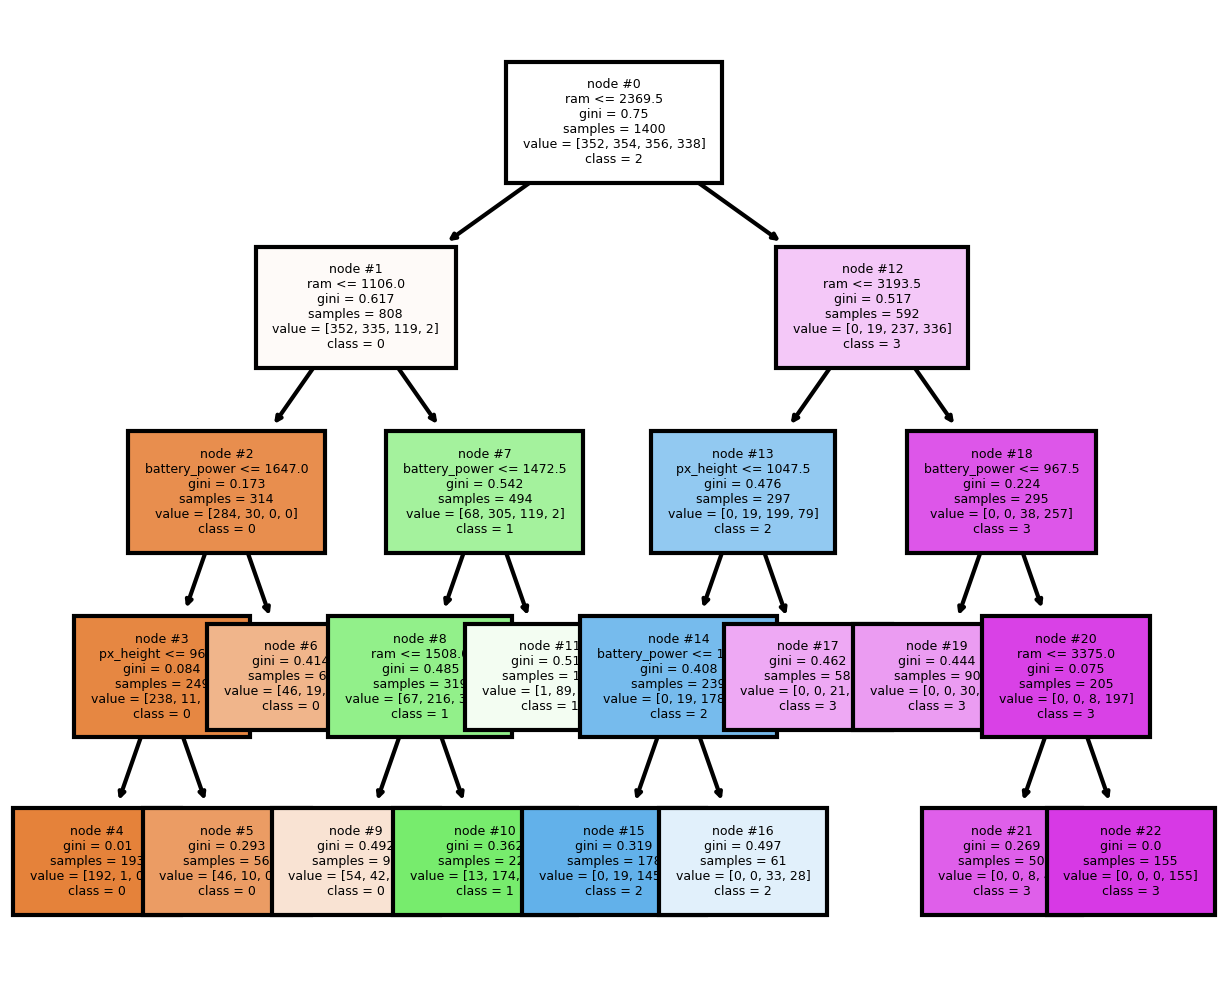

In [145]:
from sklearn import tree
import matplotlib.pyplot as plt

price_range=['0', '1', '2', '3']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=price_range, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

### Prediction

In [146]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted
1917,0.0,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,...,253.0,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0,0.0
540,0.0,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,...,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0,0.0
1264,1.0,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,...,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0,1.0
14,0.0,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,...,356.0,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0,0.0
566,0.0,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,...,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0,0.0


### Final accuracy of Model after Pruning

In [147]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['price_range'])
print(matrix)

[[338  72   0   0]
 [ 14 263 119   2]
 [  0  19 178  42]
 [  0   0  59 294]]


In [130]:
train.shape

(1400, 22)

In [1]:
Accuracy_Train=((338+263+178+294)/(1400)*100)
print(Accuracy_Train)

76.64285714285714


In [149]:
from sklearn.metrics import classification_report
print(classification_report(train['price_range'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       352
         1.0       0.66      0.74      0.70       354
         2.0       0.74      0.50      0.60       356
         3.0       0.83      0.87      0.85       338

    accuracy                           0.77      1400
   macro avg       0.77      0.77      0.76      1400
weighted avg       0.76      0.77      0.76      1400



# Predictions On test dataset

In [150]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1890,1991.0,0.0,2.8,0.0,3.0,1.0,15.0,0.1,181.0,1.0,...,298.0,1037.0,1861.0,8.0,5.0,17.0,1.0,1.0,1.0,1.0
1005,1270.0,1.0,2.3,0.0,0.0,0.0,58.0,0.5,104.0,5.0,...,1512.0,1716.0,3299.0,13.0,4.0,16.0,1.0,0.0,1.0,3.0
29,851.0,0.0,0.5,0.0,3.0,0.0,21.0,0.4,200.0,5.0,...,1171.0,1263.0,478.0,12.0,7.0,10.0,1.0,0.0,1.0,0.0
695,560.0,1.0,2.0,1.0,6.0,1.0,57.0,0.3,81.0,3.0,...,80.0,1327.0,2167.0,11.0,10.0,7.0,1.0,0.0,1.0,1.0
1858,1615.0,1.0,2.8,0.0,3.0,0.0,9.0,0.9,117.0,1.0,...,542.0,678.0,2948.0,8.0,3.0,3.0,1.0,1.0,0.0,2.0


In [151]:
test['Predicted']=dt.predict(X_test)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Predicted
1890,1991.0,0.0,2.8,0.0,3.0,1.0,15.0,0.1,181.0,1.0,...,1037.0,1861.0,8.0,5.0,17.0,1.0,1.0,1.0,1.0,1.0
1005,1270.0,1.0,2.3,0.0,0.0,0.0,58.0,0.5,104.0,5.0,...,1716.0,3299.0,13.0,4.0,16.0,1.0,0.0,1.0,3.0,3.0
29,851.0,0.0,0.5,0.0,3.0,0.0,21.0,0.4,200.0,5.0,...,1263.0,478.0,12.0,7.0,10.0,1.0,0.0,1.0,0.0,0.0
695,560.0,1.0,2.0,1.0,6.0,1.0,57.0,0.3,81.0,3.0,...,1327.0,2167.0,11.0,10.0,7.0,1.0,0.0,1.0,1.0,1.0
1858,1615.0,1.0,2.8,0.0,3.0,0.0,9.0,0.9,117.0,1.0,...,678.0,2948.0,8.0,3.0,3.0,1.0,1.0,0.0,2.0,2.0


## Step 9 : Model Performance Metrics on Test data

In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['price_range'])
print(confusion_matrix)

[[144  38   0   0]
 [  4  97  44   2]
 [  0  11  70  20]
 [  0   0  30 140]]


In [137]:
test.shape

(600, 22)

In [153]:
Accuracy_test=(144+97+70+140)/(600)*100
Accuracy_test

75.16666666666667

# Sensitivity & Specificity

In [154]:
from sklearn.metrics import classification_report
print(classification_report(test['price_range'], test['Predicted']))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       148
         1.0       0.66      0.66      0.66       146
         2.0       0.69      0.49      0.57       144
         3.0       0.82      0.86      0.84       162

    accuracy                           0.75       600
   macro avg       0.74      0.75      0.74       600
weighted avg       0.74      0.75      0.74       600



### Grid Search Method

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [200, 400,350], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [200, 400, 350]},
             verbose=1)

In [156]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=200,
                       random_state=42)

# Random Forest

# Model building 

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=13, # make 14 tress becoz col is 14
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

C:\Users\Arati V Kathe\AppData\Local\Temp\ipykernel_16884\748076770.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=13)

# Random Forest Visualization

In [159]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [160]:
list(X.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [ ]:
os.chdir(r"C:\Users\Arati V Kathe\Downloads")

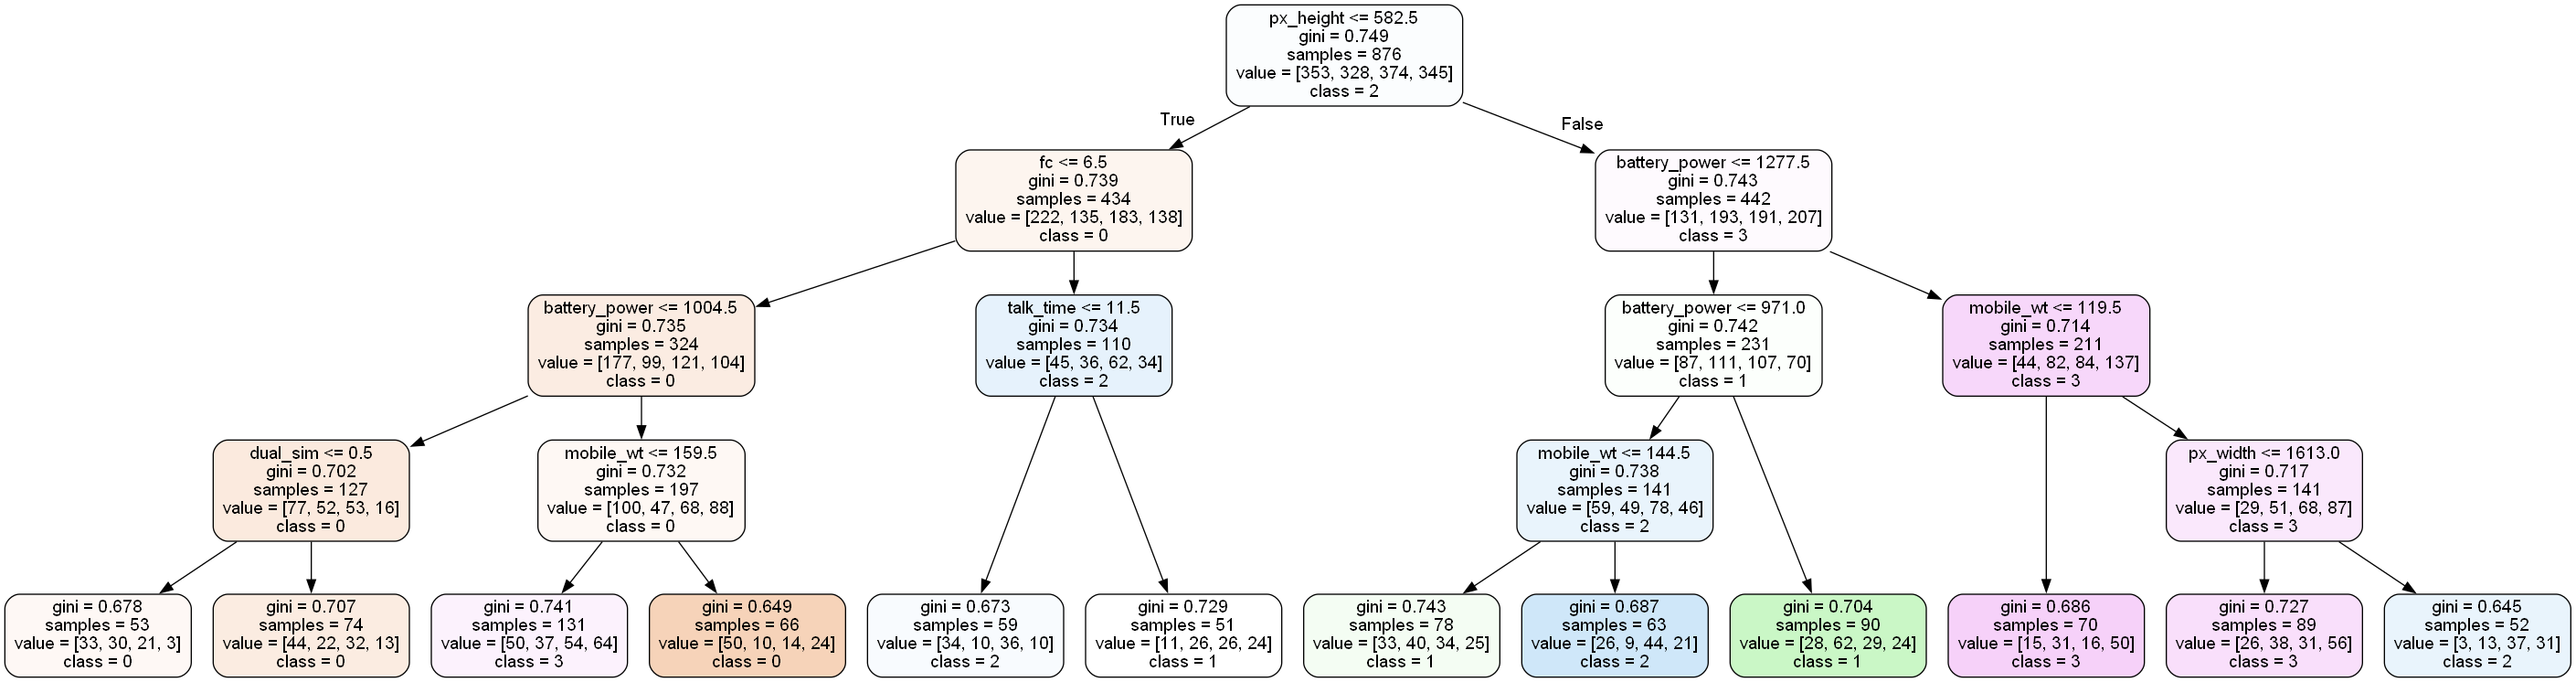

In [162]:
tree = Model.estimators_[12]  # specify the tree number  
price_range=['0', '1', '2', '3'] 
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=price_range,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file(r"C:\Users\Arati V Kathe\Downloads\abc.dot")
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Predictions on Train Dataset

In [163]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1917,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,7.0,...,253.0,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0,0.0
540,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,1.0,...,767.0,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0,0.0
1264,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,1.0,...,864.0,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0,1.0
14,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,1.0,...,356.0,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0,0.0
566,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,8.0,...,27.0,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0,0.0


In [164]:
train['Predicted']=Model.predict(X_train)
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Predicted
1917,1802.0,0.0,2.7,1.0,0.0,1.0,10.0,0.6,101.0,7.0,...,590.0,696.0,14.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0
540,504.0,1.0,0.5,1.0,5.0,0.0,16.0,0.1,166.0,1.0,...,1665.0,701.0,17.0,15.0,15.0,1.0,0.0,1.0,0.0,0.0
1264,676.0,0.0,2.2,0.0,1.0,1.0,39.0,0.2,84.0,1.0,...,1011.0,2064.0,13.0,7.0,6.0,1.0,0.0,0.0,1.0,1.0
14,1866.0,0.0,0.5,0.0,13.0,1.0,52.0,0.7,185.0,1.0,...,563.0,373.0,14.0,9.0,3.0,1.0,0.0,1.0,0.0,0.0
566,1170.0,1.0,1.2,0.0,4.0,0.0,30.0,0.4,83.0,8.0,...,1722.0,1073.0,6.0,4.0,8.0,1.0,1.0,0.0,0.0,0.0


# Model Performance Metrics

In [165]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['price_range'], train['Predicted'])
print(confusion_matrix)

[[339  13   0   0]
 [ 60 267  27   0]
 [  1  77 227  51]
 [  0   0  11 327]]


In [166]:
train.shape

(1400, 22)

In [167]:
Accuracy_Train=((339+267+227+327)/(1400)*100)
print(Accuracy_Train)

82.85714285714286


In [168]:
from sklearn.metrics import classification_report
print(classification_report(train['price_range'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       352
         1.0       0.75      0.75      0.75       354
         2.0       0.86      0.64      0.73       356
         3.0       0.87      0.97      0.91       338

    accuracy                           0.83      1400
   macro avg       0.83      0.83      0.82      1400
weighted avg       0.83      0.83      0.82      1400



# Predictions on Test Dataset

In [169]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1890,1991.0,0.0,2.8,0.0,3.0,1.0,15.0,0.1,181.0,1.0,...,298.0,1037.0,1861.0,8.0,5.0,17.0,1.0,1.0,1.0,1.0
1005,1270.0,1.0,2.3,0.0,0.0,0.0,58.0,0.5,104.0,5.0,...,1512.0,1716.0,3299.0,13.0,4.0,16.0,1.0,0.0,1.0,3.0
29,851.0,0.0,0.5,0.0,3.0,0.0,21.0,0.4,200.0,5.0,...,1171.0,1263.0,478.0,12.0,7.0,10.0,1.0,0.0,1.0,0.0
695,560.0,1.0,2.0,1.0,6.0,1.0,57.0,0.3,81.0,3.0,...,80.0,1327.0,2167.0,11.0,10.0,7.0,1.0,0.0,1.0,1.0
1858,1615.0,1.0,2.8,0.0,3.0,0.0,9.0,0.9,117.0,1.0,...,542.0,678.0,2948.0,8.0,3.0,3.0,1.0,1.0,0.0,2.0


In [170]:
test['Predicted']=Model.predict(X_test)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Predicted
1890,1991.0,0.0,2.8,0.0,3.0,1.0,15.0,0.1,181.0,1.0,...,1037.0,1861.0,8.0,5.0,17.0,1.0,1.0,1.0,1.0,1.0
1005,1270.0,1.0,2.3,0.0,0.0,0.0,58.0,0.5,104.0,5.0,...,1716.0,3299.0,13.0,4.0,16.0,1.0,0.0,1.0,3.0,3.0
29,851.0,0.0,0.5,0.0,3.0,0.0,21.0,0.4,200.0,5.0,...,1263.0,478.0,12.0,7.0,10.0,1.0,0.0,1.0,0.0,0.0
695,560.0,1.0,2.0,1.0,6.0,1.0,57.0,0.3,81.0,3.0,...,1327.0,2167.0,11.0,10.0,7.0,1.0,0.0,1.0,1.0,1.0
1858,1615.0,1.0,2.8,0.0,3.0,0.0,9.0,0.9,117.0,1.0,...,678.0,2948.0,8.0,3.0,3.0,1.0,1.0,0.0,2.0,2.0


# Model Performance Metrics on Test data 

In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['price_range'])
print(confusion_matrix)

[[142  36   0   0]
 [  6  95  22   0]
 [  0  12  98  15]
 [  0   3  24 147]]


In [172]:
test.shape

(600, 22)

In [173]:
Accuracy_test=((142+95+98+147)/(600)*100)
Accuracy_test

80.33333333333333

In [174]:
from sklearn.metrics import classification_report
print(classification_report(test['price_range'], test['Predicted']))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87       148
         1.0       0.77      0.65      0.71       146
         2.0       0.78      0.68      0.73       144
         3.0       0.84      0.91      0.88       162

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



# Gradient Boosting

In [199]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [204]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = new.drop('price_range',axis=1)
y = new[["price_range"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [205]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [206]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [207]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 4}


In [208]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=4)

In [209]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [210]:
train_pred

array([2., 0., 0., ..., 1., 0., 1.])

# Confusion Matrix Train Data (2 Model)

In [211]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       408
         1.0       0.89      0.89      0.89       404
         2.0       0.89      0.88      0.89       394
         3.0       0.96      0.95      0.95       394

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



# Confusion Matrix Test Data (2 Model) 

In [212]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        92
         1.0       0.76      0.83      0.80        96
         2.0       0.83      0.78      0.81       106
         3.0       0.92      0.88      0.90       106

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.84      0.85       400



# Gradient Boosting Tree

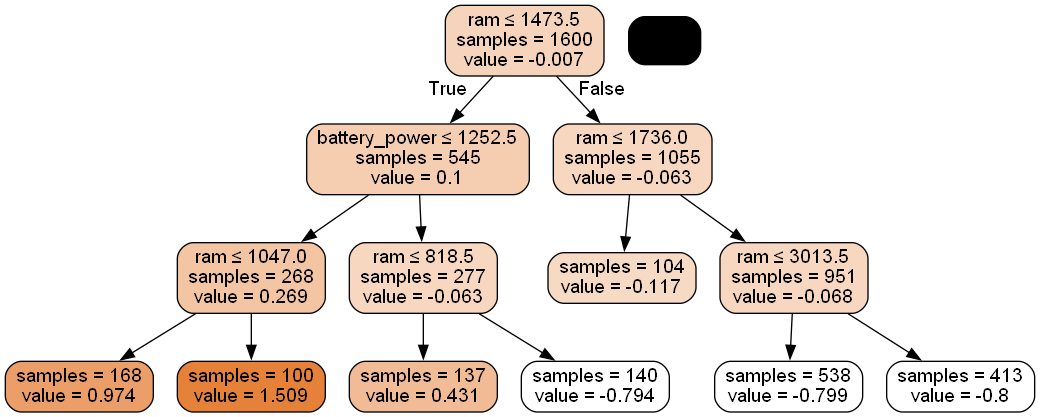

In [213]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[1, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
Price_Range=[0,1,2,3]
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Price_Range,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Finish